In [559]:
np.set_printoptions(suppress=True)
from __future__ import division

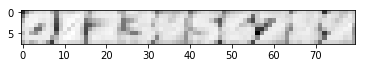

0
1000
2000
3000
4000
5000
6000
Average Train Conditional Likelihood [ 0.09867773  0.09678548  0.09926506  0.09756555  0.09864704  0.09674104
  0.0981399   0.09528698  0.09892776  0.09720246]
0
1000
2000
3000
Average Test Conditional Likelihood [ 0.09867773  0.09678548  0.09926506  0.09756555  0.09864704  0.09674104
  0.0981399   0.09528698  0.09892776  0.09720246]
0
1000
2000
3000
4000
5000
6000
0
1000
2000
3000
Train Accuracy 0.981285714286
Test Accuracy 0.95925


In [562]:
'''
Question 2.2 Skeleton Code

Here you should implement and evaluate the Conditional Gaussian classifier.
'''


import data
import numpy as np
# Import pyplot - plt.imshow is useful!
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
from __future__ import division

np.random.seed(1337)

def compute_mean_mles(train_data, train_labels):
    '''
    Compute the mean estimate for each digit class

    Should return a numpy array of size (10,64)
    The ith row will correspond to the mean estimate for digit class i
    '''
    means = np.zeros((10, 64))
    # Compute means
    for i in range(10):
            means[i] = train_data[train_labels == i].mean(0)
    return means

def compute_sigma_mles(train_data, train_labels):
    '''
    Compute the covariance estimate for each digit class

    Should return a three dimensional numpy array of shape (10, 64, 64)
    consisting of a covariance matrix for each digit class 
    '''
    covariances = np.zeros((10, 64, 64))
    for digit in range(10):
        
        digit_data = train_data[train_labels == digit]
        
        for i in range(64):
            for j in range(64):
                a = ([x[i] for x in digit_data]  - np.mean([x[i] for x in digit_data]))
                b = ([x[j] for x in digit_data] - np.mean([x[j] for x in digit_data]))
                covOut = sum( a * b /len(a) )
                
                covariances[digit][i][j] = covOut
                
        covariances[digit] + 0.01 * np.identity(64)
        
    # Compute covariances
    return covariances

def plot_cov_diagonal(covariances):
    # Plot the log-diagonal of each covariance matrix side by side
    logCovList = []
    for i in range(10):
        cov_diag = np.diag(covariances[i])
        logCovList.append(np.log(cov_diag).reshape(8,8))
        # ...
        
    all_concat = np.concatenate(logCovList, 1)
    plt.imshow(all_concat, cmap='gray')
    plt.show()

def generative_likelihood(digits, means, covariances):
    '''
    Compute the generative log-likelihood:
        log p(x|y,mu,Sigma)

    Should return an n x 10 numpy array 
    '''
    GenLikelihood = np.zeros((digits.shape[0],10))

    for i in range(digits.shape[0]):
        
        if i%1000 == 0:
            print i
        
        for j in range(10):
    
            Numerator = ((-1/2) * (digits[i] - means[j]).transpose().dot(
                         np.linalg.inv(covariances[j])).dot( (digits[i] - means[j])))

            Denominator = np.log(np.sqrt( np.power(2* np.pi,10/2) * np.linalg.det(covariances[j])))
            
            GenLikelihood[i][j] = Numerator - Denominator

    return GenLikelihood

def conditional_likelihood(digits, means, covariances):
    '''
    Compute the conditional likelihood:

        log p(y|x, mu, Sigma)

    This should be a numpy array of shape (n, 10)
    Where n is the number of datapoints and 10 corresponds to each digit class
    '''
    #Calculate p(X)
    
    GenLikelihood = generative_likelihood(digits,means,covariances)
        
    CondLikelihood = (np.exp(GenLikelihood) * (1/10)) / (1/10 * 
                                                         (np.exp(GenLikelihood)).sum(1)[:,None])
    
    return CondLikelihood

def avg_conditional_likelihood(digits, labels, means, covariances):
    '''
    Compute the average conditional likelihood over the true class labels

        AVG( log p(y_i|x_i, mu, Sigma) )

    i.e. the average log likelihood that the model assigns to the correct class label
    '''
    cond_likelihood = conditional_likelihood(digits, means, covariances)

    # Compute as described above and return
    AvgCondLikelihood = np.zeros(10)
    
    for i in range(10):
            AvgCondLikelihood[i] = CondLikelihood[train_labels == i][:,i].mean()
    
    return AvgCondLikelihood

def classify_data(digits, means, covariances):
    '''
    Classify new points by taking the most likely posterior class
    '''
    cond_likelihood = conditional_likelihood(digits, means, covariances)
    # Compute and return the most likely class
    digitsClass = cond_likelihood.argmax(1).astype('float')
    return digitsClass

def main():
    train_data, train_labels, test_data, test_labels = data.load_all_data('data')

    # Fit the model
    TrainMeans = compute_mean_mles(train_data, train_labels)
    TrainCovariances = compute_sigma_mles(train_data, train_labels)
    
    plot_cov_diagonal(TrainCovariances)
    
    AvgTrain = avg_conditional_likelihood(train_data, 
                                          train_labels, TrainMeans, TrainCovariances)
    
    print("Average Train Conditional Likelihood {}".format(AvgTrain))
    
    AvgTest = avg_conditional_likelihood(test_data, 
                                          test_labels, TrainMeans, TrainCovariances)
    
    print("Average Test Conditional Likelihood {}".format(AvgTest))
    
    TrainPred = classify_data(train_data, TrainMeans, TrainCovariances)
    TestPred = classify_data(test_data, TrainMeans, TrainCovariances)
    
    print("Train Accuracy {}".format((TrainPred == train_labels).sum() / len(train_labels)))
    print("Test Accuracy {}".format((TestPred == test_labels).sum() / len(test_labels)))
    
    conditional_likelihood
    
    # Evaluation

if __name__ == '__main__':
    main()

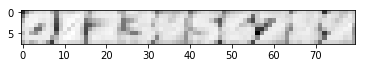

In [395]:
train_data, train_labels, test_data, test_labels = data.load_all_data('data')

# Fit the model
means = compute_mean_mles(train_data, train_labels)
covariances = compute_sigma_mles(train_data, train_labels)
plot_cov_diagonal(covariances)
# Evaluation

In [548]:
PredLabels = classify_data(train_data,means,covariances)

0
1000
2000
3000
4000
5000
6000


In [549]:
train_labels

array([ 6.,  1.,  6., ...,  3.,  9.,  4.])

In [550]:
PredLabels

array([ 6.,  1.,  6., ...,  3.,  9.,  4.])

In [551]:
PredLabels.astype('float')[:10]

array([ 6.,  1.,  6.,  6.,  3.,  1.,  3.,  3.,  8.,  9.])

In [552]:
train_labels[:10]

array([ 6.,  1.,  6.,  6.,  3.,  1.,  3.,  3.,  8.,  9.])

In [553]:
sum(PredLabels == train_labels)

6869

In [557]:
covariances.min(), covariances.max()

(-0.080052491836734782, 0.15302534693877648)

In [522]:
GenLikelihood = generative_likelihood(train_data,means,covariances)
        
CondLikelihood = (np.exp(GenLikelihood) * (1/10)) / (np.exp(GenLikelihood)).sum(1)[:,None]

GenLikelihood

0
1000
2000
3000
4000
5000
6000


array([[ -205.48538003,  -911.46318918,  -113.97014133, ...,
        -5795.39448496,  -364.04359439, -2858.70863751],
       [ -282.2912748 ,   137.64914549,     4.22683673, ...,
           36.64049421,    52.63490024,    32.39839409],
       [ -706.68066965, -1803.69943383,  -189.45712519, ...,
        -4117.37200076,  -163.0495586 , -2803.80139167],
       ..., 
       [  -55.74427537, -1656.25020612,   -95.06097259, ...,
         -995.26308532,   -94.10787048, -1013.03261072],
       [-1009.03036413, -1627.68697229,  -400.82521767, ...,
        -1710.86772358,  -310.27691258,    24.06277665],
       [-1724.9238908 , -2827.1299496 ,  -434.43575643, ...,
        -3367.08467243,  -605.7361609 , -1341.14256657]])

In [523]:
GenLikelihood[-1]

array([-1724.9238908 , -2827.1299496 ,  -434.43575643,  -601.72249999,
          -1.68194957,  -605.28809025, -1089.67482429, -3367.08467243,
        -605.7361609 , -1341.14256657])

In [524]:
np.exp(GenLikelihood[-1])

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.18601098,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [525]:
CondLikelihood[-1]

array([ 0. ,  0. ,  0. ,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ])

In [558]:
avg_conditional_likelihood(train_data, train_labels, means, covariances)

0
1000
2000
3000
4000
5000
6000


array([ 0.09867773,  0.09678548,  0.09926506,  0.09756555,  0.09864704,
        0.09674104,  0.0981399 ,  0.09528698,  0.09892776,  0.09720246])

In [65]:
means = compute_mean_mles(train_data, train_labels)
covariances = compute_sigma_mles(train_data, train_labels)


In [206]:
digits = train_data
print(means[1].shape)
print(covariances[1].shape)
print(digits.shape)

(64,)
(64, 64)
(7000, 64)


In [197]:
#Denominator generative_likelihood
j = 1
Denominator = np.log(np.sqrt( np.power(2* np.pi,10) * np.linalg.det(covariances[j]) ))
Denominator.shape
Denominator

-147.67171669672189

In [ ]:
    
            Numerator = ((-1/2) * (digits[i] - means[j]).transpose() * 
                         np.linalg.inv(covariances[j]) * (digits[i] - means[j]))

In [222]:
#Numerator
i = 1

print((digits[i] - means[j]).transpose().shape) 
print(np.linalg.inv(covariances[j]).shape)
print((digits[i] - means[j]).shape)

Numerator = (-1/2)*( (digits[i] - means[j]).transpose().dot(
                     np.linalg.inv(covariances[j]) ).dot((digits[i] - means[j])))

print((Numerator / Denominator).shape)
Numerator / Denominator

(64,)
(64, 64)
(64,)
()


5.9936369172162056

In [160]:
print((digits - means[1]).shape)
print(np.linalg.inv(covariances[i]).shape)

(7000, 64)
(64, 64)


In [218]:
print((digits - means[1]).transpose().shape)
print((np.linalg.inv(covariances[i]) * (means[1])).shape)


(64, 7000)
(64, 64)


In [219]:
(digits - means[1]).transpose().dot(np.linalg.inv(covariances[i]))

ValueError: shapes (64,7000) and (64,64) not aligned: 7000 (dim 1) != 64 (dim 0)

In [113]:
np.log(np.sqrt( np.power(2* np.pi,10) * np.abs(covariances[1]) ))

(64, 64)

In [213]:
np.zeros((digits.shape[0],10)).shape

(7000, 10)

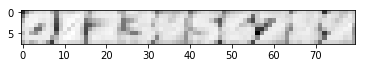

In [81]:
plot_cov_diagonal(covariances)

In [85]:
print(means.shape)
print(covariances.shape)

(10, 64)
(10, 64, 64)


In [68]:
np.diag(covariances[1])

array([ 0.00636434,  0.04744437,  0.05584498,  0.04712298,  0.04565981,
        0.06993632,  0.08437145,  0.0404086 ,  0.00545176,  0.06452979,
        0.10335628,  0.1049087 ,  0.11970745,  0.13537668,  0.10439102,
        0.03378768,  0.00282205,  0.0486181 ,  0.11253859,  0.13380157,
        0.13900071,  0.0927284 ,  0.10155969,  0.00660041,  0.00183754,
        0.04102082,  0.11334433,  0.13770854,  0.06284215,  0.12372302,
        0.05653155,  0.00257551,  0.00137617,  0.04567881,  0.12395663,
        0.05653304,  0.12707362,  0.11226641,  0.0376904 ,  0.00216973,
        0.00517135,  0.08981557,  0.0807572 ,  0.12769525,  0.15302535,
        0.10256662,  0.03705333,  0.00197706,  0.028203  ,  0.09763357,
        0.13303186,  0.1431981 ,  0.12296841,  0.10143637,  0.06264693,
        0.00503118,  0.04350391,  0.08271082,  0.08359062,  0.06452483,
        0.06261097,  0.05942188,  0.04389185,  0.005545  ])

In [42]:
covariances = np.zeros((10, 64, 64))


In [17]:
train_data[np.argwhere(train_labels == 1)][0]

(1, 64)

In [74]:
np.log2(np.diag(covariances[1])).reshape(8,8)

array([[-7.29577439, -4.39761927, -4.16242871, -4.40742531, -4.45293145,
        -3.83781429, -3.56710134, -4.62919383],
       [-7.51906158, -3.95389086, -3.27430202, -3.25279375, -3.06241518,
        -2.8849488 , -3.25993049, -4.88735904],
       [-8.46904011, -4.36236277, -3.15150834, -2.90183309, -2.84683585,
        -3.43084487, -3.29960026, -7.24322904],
       [-9.08801215, -4.60750002, -3.14121593, -2.86031011, -3.9921237 ,
        -3.01481417, -4.14479991, -8.60092877],
       [-9.50512858, -4.45233108, -3.01209263, -4.14476202, -2.97626355,
        -3.15500178, -4.72965894, -8.8482712 ],
       [-7.59524396, -3.47689068, -3.63026523, -2.96922325, -2.70815746,
        -3.28536677, -4.75425299, -8.98242986],
       [-5.14800757, -3.3564789 , -2.91015633, -2.80391572, -3.02364033,
        -3.30135305, -3.99661238, -7.63488812],
       [-4.52271098, -3.59578014, -3.58051505, -3.95400179, -3.99744072,
        -4.07286194, -4.5099032 , -7.49459555]])